# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis¶

In [2]:
raw_data = pd.read_csv('TSNE_Exercise_2.csv')
raw_data.sample(5)

,TSNE Element 1,TSNE Element 2,TSNE Element 3,stimulus,restimulus
46008,21.940142,-24.552406,-5.228119,8,8
40423,5.563660,-36.863200,-16.156487,7,7
35495,-17.461035,3.181463,-17.047424,0,0
5935,1.318780,1.732431,-6.948446,1,1
19885,-6.166161,-2.226160,0.318903,4,4


In [3]:
raw_data.shape

(107824, 5)

In [4]:
raw_data.columns

Index(['TSNE Element 1', 'TSNE Element 2', 'TSNE Element 3', 'stimulus',
       'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107824 entries, 0 to 107823
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TSNE Element 1  107824 non-null  float64
 1   TSNE Element 2  107824 non-null  float64
 2   TSNE Element 3  107824 non-null  float64
 3   stimulus        107824 non-null  int64  
 4   restimulus      107824 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 4.1 MB


In [6]:
raw_data.describe(include='all')

,TSNE Element 1,TSNE Element 2,TSNE Element 3,stimulus,restimulus
count,107824.000000,107824.000000,107824.000000,107824.000000,107824.000000
mean,1.667076,-2.259361,0.586939,4.445355,4.445355
std,18.974500,19.252933,18.753936,5.722282,5.722282
min,-49.244015,-46.021710,-42.550087,0.000000,0.000000
25%,-11.556058,-17.154794,-13.401589,0.000000,0.000000
50%,2.113935,-3.032713,0.243812,0.000000,0.000000
75%,15.300655,12.327403,14.572192,9.000000,9.000000
max,49.679928,50.600677,49.141010,17.000000,17.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     54869
17     4196
12     3604
6      3583
9      3502
16     3391
1      3358
2      3168
3      3130
7      3079
13     3064
10     3012
4      2966
8      2858
11     2764
15     2656
5      2537
14     2087
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

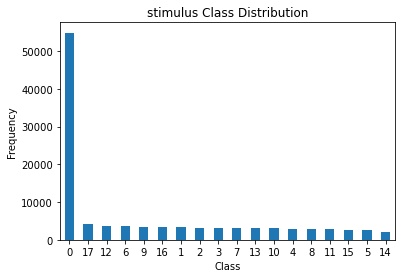

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
raw_data.sample(5)

,TSNE Element 1,TSNE Element 2,TSNE Element 3,stimulus,restimulus
37302,15.457345,-1.233703,-17.891730,6,6
41484,36.055443,4.249632,28.093554,7,7
66989,5.115580,37.455795,5.965632,0,0
8545,-41.780437,-0.037313,8.018822,0,0
53126,0.922747,13.321816,-20.447685,0,0


In [11]:
raw_data.shape

(107824, 5)

In [12]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107824 entries, 0 to 107823
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TSNE Element 1  107824 non-null  float64
 1   TSNE Element 2  107824 non-null  float64
 2   TSNE Element 3  107824 non-null  float64
 3   stimulus        107824 non-null  int64  
 4   restimulus      107824 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 4.1 MB


In [13]:
print(raw_data.isnull().any())

TSNE Element 1    False
TSNE Element 2    False
TSNE Element 3    False
stimulus          False
restimulus        False
dtype: bool


In [14]:
X = raw_data.iloc[:,0:3]
y = raw_data.stimulus

# Splitting data for training and testing

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 39)

# Machine Learning Models

# Decision Tree

In [16]:
from sklearn import tree
import time
start_time = time.time()
tree = tree.DecisionTreeClassifier(ccp_alpha= 0.0,
              class_weight= None,
              criterion = "entropy",
              max_depth = None,
              max_features = None,
              max_leaf_nodes = None,
              min_impurity_decrease = 0.0,
              min_samples_leaf = 1,
              min_samples_split = 2,
              min_weight_fraction_leaf = 0.0,
              random_state = None,
              splitter = 'best')
tree.fit(X_train, y_train)
print (time.time() - start_time, "seconds")

4.898390054702759 seconds


In [17]:
y_pred1 = tree.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 87.64722247982935


Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      5555
           1       0.81      0.80      0.81       328
           2       0.82      0.83      0.83       301
           3       0.80      0.77      0.79       312
           4       0.71      0.73      0.72       299
           5       0.78      0.78      0.78       225
           6       0.87      0.87      0.87       386
           7       0.77      0.79      0.78       300
           8       0.87      0.85      0.86       274
           9       0.88      0.82      0.85       363
          10       0.88      0.88      0.88       326
          11       0.71      0.74      0.73       278
          12       0.76      0.72      0.74       360
          13       0.76      0.77      0.76       300
          14       0.80      0.77      0.78       187
          15       0.82      0.87      0.84       258
          16       0.90      0.86      0.88       339
 

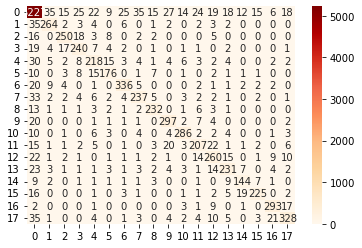

In [19]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [20]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 0.7270703885746082
MSE: 7.020124269683762
RMSE: 2.6495517110793974


In [21]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.8769421786744469
Recall Score :  0.8764722247982936
f1_score :  0.8765407998353489


# KNeighborsClassifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier
import time
start_time = time.time()
KNeighborsClassifier = KNeighborsClassifier(algorithm = 'brute',
                                            leaf_size = 30,
                                            metric = 'minkowski',
                                            metric_params= None,
                                            n_jobs = -1,
                                            n_neighbors = 2,
                                            p = 1,
                                            weights = 'uniform')
KNeighborsClassifier.fit(X_train, y_train)
print (time.time() - start_time, "seconds")

0.018965482711791992 seconds


In [23]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 89.95641287211352


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      5555
           1       0.83      0.83      0.83       328
           2       0.80      0.84      0.82       301
           3       0.87      0.77      0.82       312
           4       0.78      0.76      0.77       299
           5       0.83      0.79      0.81       225
           6       0.93      0.85      0.88       386
           7       0.86      0.79      0.82       300
           8       0.89      0.83      0.86       274
           9       0.88      0.85      0.87       363
          10       0.91      0.89      0.90       326
          11       0.80      0.73      0.76       278
          12       0.81      0.75      0.78       360
          13       0.85      0.74      0.79       300
          14       0.86      0.86      0.86       187
          15       0.93      0.84      0.88       258
          16       0.91      0.86      0.89       339
 

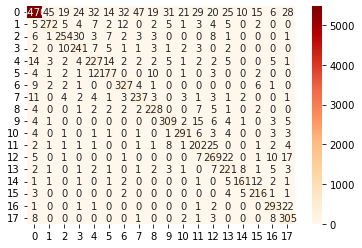

In [25]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [26]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 0.5670036168042288
MSE: 5.240842066215339
RMSE: 2.2892885502302542


In [27]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.8981669485048265
Recall Score :  0.8995641287211351
f1_score :  0.8976589638009935


# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
import time
start_time = time.time()
RandomForestClassifier = RandomForestClassifier(
              bootstrap = True,
              ccp_alpha = 0.0,
              class_weight =  None,
              criterion = 'entropy',
              max_depth = None,
              max_features = 'auto' ,
              max_leaf_nodes = None,
              max_samples = None,
              min_impurity_decrease = 0.0,
              min_samples_leaf = 1,
              min_samples_split = 2,
              min_weight_fraction_leaf = 0.0,
              n_estimators = 100,
              n_jobs = None,
              oob_score = False,
              random_state = None,
              verbose = 0,
              warm_start = False)
RandomForestClassifier.fit(X_train, y_train)
print (time.time() - start_time, "seconds")

114.95369410514832 seconds


In [29]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 90.16971158304739


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      5555
           1       0.90      0.79      0.84       328
           2       0.85      0.79      0.82       301
           3       0.87      0.79      0.83       312
           4       0.80      0.72      0.75       299
           5       0.80      0.82      0.81       225
           6       0.92      0.86      0.89       386
           7       0.87      0.80      0.83       300
           8       0.87      0.86      0.86       274
           9       0.92      0.85      0.88       363
          10       0.91      0.90      0.91       326
          11       0.81      0.77      0.79       278
          12       0.84      0.76      0.80       360
          13       0.84      0.77      0.80       300
          14       0.86      0.82      0.84       187
          15       0.92      0.88      0.90       258
          16       0.90      0.88      0.89       339
 

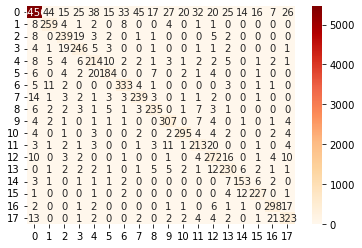

In [31]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [32]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.5681164796438839
MSE: 5.381990169711583
RMSE: 2.319911672825408


In [33]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.8999160922623604
Recall Score :  0.9016971158304738
f1_score :  0.899862419486636


# ExtraTreesClassifier

In [34]:
from sklearn.ensemble import ExtraTreesClassifier
import time
start_time = time.time()
extratree = ExtraTreesClassifier(bootstrap = False,
             ccp_alpha = 0.0,
             class_weight = None,
             criterion = 'entropy',
             max_depth = None,
             max_features = 'auto',
             max_leaf_nodes = None,
             max_samples = None,
             min_impurity_decrease = 0.0,
             min_samples_leaf = 1,
             min_samples_split = 2,
             min_weight_fraction_leaf = 0.0,
             n_estimators = 100,
             n_jobs = None,
             oob_score = False,
             random_state = None,
             verbose = 0,
             warm_start = False)
extratree.fit(X_train, y_train)
print (time.time() - start_time, "seconds")

15.302038669586182 seconds


In [35]:
y_pred5 = extratree.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 90.31809329500139


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      5555
           1       0.88      0.82      0.85       328
           2       0.84      0.80      0.82       301
           3       0.88      0.79      0.84       312
           4       0.80      0.75      0.77       299
           5       0.80      0.81      0.81       225
           6       0.93      0.87      0.90       386
           7       0.86      0.80      0.83       300
           8       0.89      0.86      0.87       274
           9       0.92      0.87      0.89       363
          10       0.89      0.90      0.90       326
          11       0.84      0.78      0.81       278
          12       0.84      0.78      0.81       360
          13       0.83      0.80      0.81       300
          14       0.86      0.82      0.84       187
          15       0.90      0.87      0.89       258
          16       0.91      0.87      0.89       339
 

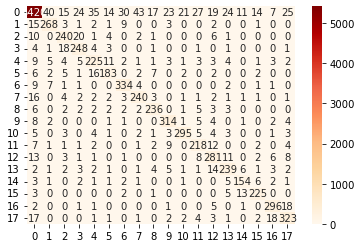

In [37]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [38]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.5688583882036539
MSE: 5.442270240192896
RMSE: 2.3328673858993563


In [39]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.9016990007725061
Recall Score :  0.9031809329500139
f1_score :  0.901860844727323


# XGBoost

In [40]:
from xgboost import XGBClassifier
import time
start_time = time.time()
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
print (time.time() - start_time, "seconds")

C:\Users\nafem\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\nafem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nafem\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:26:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
147.1398503780365 seconds


In [41]:
y_pred4 = xgb.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 88.57460817954187


Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      5555
           1       0.89      0.74      0.81       328
           2       0.86      0.75      0.80       301
           3       0.87      0.74      0.80       312
           4       0.70      0.67      0.69       299
           5       0.75      0.80      0.77       225
           6       0.89      0.84      0.86       386
           7       0.94      0.78      0.85       300
           8       0.89      0.82      0.85       274
           9       0.89      0.82      0.85       363
          10       0.86      0.89      0.88       326
          11       0.76      0.72      0.74       278
          12       0.75      0.69      0.72       360
          13       0.84      0.70      0.76       300
          14       0.84      0.78      0.81       187
          15       0.88      0.85      0.87       258
          16       0.88      0.85      0.86       339
 

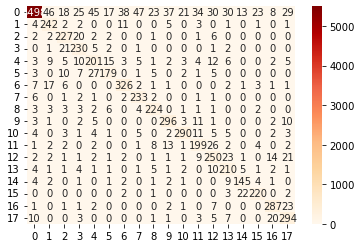

In [43]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [44]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 0.6526013168876936
MSE: 6.119169062413057
RMSE: 2.4736954263637747


In [45]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.8836035012815899
Recall Score :  0.8857460817954187
f1_score :  0.8827808549929128
